<a href="https://colab.research.google.com/github/kavehkarimadini/ARC_101_Projects/blob/main/Heart_disease_dataset_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

>This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

>> - age
>> - sex
>> - chest pain type (4 values)
>> - resting blood pressure
>> - serum cholestoral in mg/dl
>> - fasting blood sugar > 120 mg/dl
>> - resting electrocardiographic results (values 0,1,2)
>> - maximum heart rate achieved
>> - exercise induced angina
>> - oldpeak = ST depression induced by exercise relative to rest
>> - the slope of the peak exercise ST segment
>> - number of major vessels (0-3) colored by flourosopy
>> - thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from ydata_profiling import ProfileReport

In [4]:
data = pd.read_csv("/content/heart(1).xls")

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
print(data['target'].value_counts())

target
1    526
0    499
Name: count, dtype: int64


In [6]:
data.nunique()

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [7]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df_dup = data.drop_duplicates()
print(data.shape, df_dup.shape)

(1025, 14) (302, 14)


# Outliers Detection

#### Visualization Route:
* Box Plot
* Histogram
* Scatter Plot

#### Statistic Route:
* Z-score (Standardization)
* log Transform

#### Model-Based Route:
* Cluster Analysis
* LOF (Local Outliers Factor)
* Isolation Forest

In [6]:
numerical_data = df_dup.select_dtypes(include=['number'])

In [7]:
numerical_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(numerical_data),columns=numerical_data.columns)

In [9]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
# Applying LOF with k=2 (n_neighbors=2)
lof = LocalOutlierFactor(n_neighbors=5)
lof_scores = lof.fit_predict(normalized_data)  # Negative LOF scores indicate outliers
lof_values = -lof.negative_outlier_factor_  # Extract LOF values

In [10]:
normalized_data.shape

(302, 14)

In [11]:
# Create a DataFrame for easy representation
# numerical_data = df_dup
normalized_data['LOF'] = lof_values
normalized_data['Outlier'] = np.where(lof_scores == -1, 'Yes', 'No')

In [12]:
normalized_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,LOF,Outlier
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0,0.988876,No
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0,1.484069,No
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0,1.322817,No
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0,1.014205,No
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0,1.083989,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.812500,0.0,0.666667,0.245283,0.194064,0.0,0.0,0.335878,0.0,0.241935,0.5,0.00,0.666667,1.0,1.220664,No
298,0.312500,0.0,0.666667,0.132075,0.034247,0.0,0.5,0.793893,0.0,0.096774,0.5,0.00,0.666667,1.0,0.959758,No
299,0.479167,1.0,0.000000,0.320755,0.294521,0.0,0.5,0.687023,1.0,0.000000,1.0,0.25,1.000000,0.0,1.090425,No
300,0.625000,1.0,1.000000,0.622642,0.335616,0.0,0.0,0.412214,0.0,0.000000,1.0,0.00,0.666667,0.0,1.126297,No


In [13]:
normalized_data.shape

(302, 16)

In [14]:
normalized_data['Outlier'].value_counts()

,count
Outlier,
No,285
Yes,17


In [15]:
droped_outliers = normalized_data[normalized_data['Outlier']=='No']

In [16]:
droped_outliers.shape

(285, 16)

In [17]:
X_data = droped_outliers.drop(['LOF','Outlier','target'],axis=1)
y_data = droped_outliers['target']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42,shuffle=False)

In [33]:
# pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.0 MB/s eta 0:00:00
   ━━━━

In [1]:
from pycaret.classification import *

In [56]:
full_data = pd.concat([X_train,y_train],axis=1)

<Axes: >

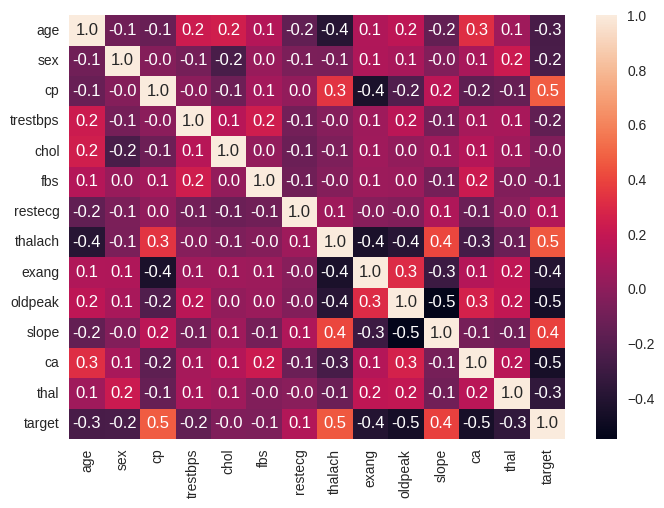

In [57]:
sns.heatmap(full_data.corr(), annot=True,fmt=".1f")

In [58]:
full_data.drop(['chol'],axis=1,inplace=True)

In [59]:
s = setup(full_data, target = 'target', session_id = 123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(228, 13)"
4,Transformed data shape,"(228, 13)"
5,Transformed train set shape,"(159, 13)"
6,Transformed test set shape,"(69, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [60]:
# functional API
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8604,0.9301,0.8944,0.8679,0.8763,0.7145,0.7237,0.1990
lda,Linear Discriminant Analysis,0.8604,0.9214,0.9417,0.8416,0.8835,0.7146,0.7327,0.0510
qda,Quadratic Discriminant Analysis,0.8546,0.9204,0.8625,0.8844,0.8679,0.7047,0.7152,0.0310
ridge,Ridge Classifier,0.8479,0.9298,0.9306,0.8327,0.8729,0.6887,0.7081,0.0340
nb,Naive Bayes,0.8421,0.9311,0.8736,0.8588,0.8570,0.6797,0.6966,0.0310
lr,Logistic Regression,0.8417,0.9199,0.9306,0.8216,0.8677,0.6759,0.6945,0.0310
et,Extra Trees Classifier,0.8233,0.9313,0.8500,0.8504,0.8424,0.6410,0.6571,0.1960
xgboost,Extreme Gradient Boosting,0.8233,0.9169,0.8597,0.8319,0.8416,0.6398,0.6480,0.0600
gbc,Gradient Boosting Classifier,0.8229,0.9101,0.8611,0.8361,0.8429,0.6379,0.6490,0.2120
knn,K Neighbors Classifier,0.8171,0.8930,0.8708,0.8282,0.8426,0.6254,0.6356,0.0480


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [61]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [66]:
# functional API
evaluate_model(best)

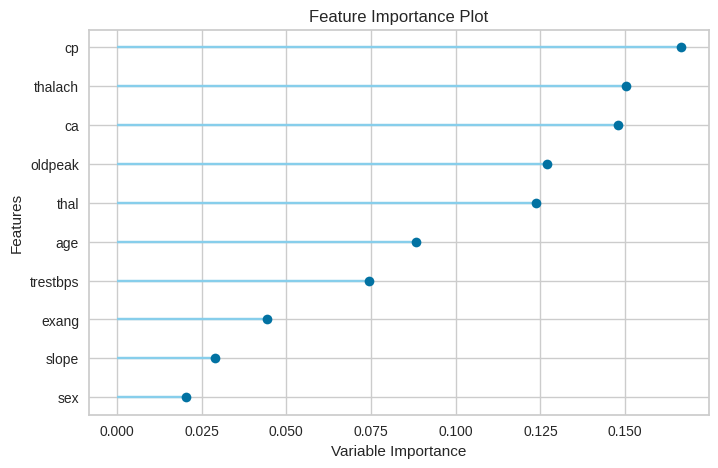

In [68]:
# functional API
plot_model(best, plot = 'feature')

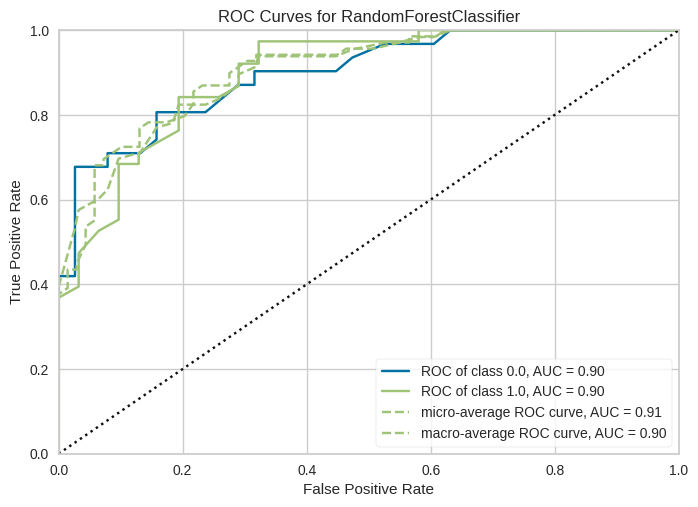

In [64]:
# functional API
plot_model(best, plot = 'auc')